In [1]:
from read_constant_params import read_const_p
from read_dynamic_params import read_dynamic_p
from sys_quat_onsite import quat_onsite_eqns
from sys_quat_offsite import quat_offsite_eqns
from sys_ter_onsite import ter_onsite_eqns
from sys_ter_offsite import ter_offsite_eqns
import numpy as np
import numba as nb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Read the parameters
# (change dynamic_p if needed after reading the file)
const_p = read_const_p()
dynamic_p = read_dynamic_p()
params = {**const_p, **dynamic_p}

In [3]:
# Parameter sets of q_i and q_j
MCP_q1_q2_vals = np.array([(q1, q2) for q1 in np.arange(1, 5) for q2 in 5*np.arange(1, 5)])

In [4]:
# Temporary variables to save steady-state GFP level
num = 2
MCP_on_arr = np.zeros((16, 4))
MCP_off_arr = np.zeros((16, 4))

In [5]:
for ind, (q1, q2) in enumerate(MCP_q1_q2_vals):
    params["mcp_on_q_i"] = q1
    params["mcp_on_q_j"] = q2
    for j in range(num):
        for i in range(num):
            # For initial conditions
        
            # Variable notation
            # x g c C D
            # 0 1 2 3 4
            # d m G
            # 0 1 2

            i_arr_MCP_on = np.zeros(5)
            j_arr_MCP_on = np.zeros(5)
            sys_arr_MCP_on = np.zeros(3)
            i_arr_MCP_on[0] = i*10
            j_arr_MCP_on[0] = j*10
            sys_arr_MCP_on[0] = params["d_t"]
            sys_arr_MCP_on[1] = params["m_t"]

            i_arr_MCP_off = np.zeros(5)
            j_arr_MCP_off = np.zeros(5)
            sys_arr_MCP_off = np.zeros(3)
            i_arr_MCP_off[0] = i*10
            j_arr_MCP_off[0] = j*10
            sys_arr_MCP_off[0] = params["d_t"]
            sys_arr_MCP_off[1] = params["m_t"]

            dt = 0.01

            for t in range(10000):
                i_arr_MCP_on, j_arr_MCP_on, sys_arr_MCP_on = quat_onsite_eqns(i_arr_MCP_on, j_arr_MCP_on,
                                                sys_arr_MCP_on, params, dt)
                i_arr_MCP_off, j_arr_MCP_off, sys_arr_MCP_off = quat_offsite_eqns(i_arr_MCP_off, j_arr_MCP_off,
                                                sys_arr_MCP_off, params, dt)
        
            MCP_on_arr[ind, num*i+j] = sys_arr_MCP_on[2]
            MCP_off_arr[ind, num*i+j] = sys_arr_MCP_off[2]

In [6]:
# Parameter sets of q_i and q_j
no_MCP_q1_q2_vals = np.array([(q1, q2) for q1 in np.arange(1, 5) for q2 in 50*np.arange(1, 5)])

In [7]:
# Temporary variables to save steady-state GFP level
num = 2
no_MCP_on_arr = np.zeros((16, 4))
no_MCP_off_arr = np.zeros((16, 4))

In [8]:
for ind, (q1, q2) in enumerate(no_MCP_q1_q2_vals):
    params["no_mcp_off_q_i"] = q1
    params["no_mcp_on_q_j"] = q2
    for j in range(num):
        for i in range(num):
            # For initial conditions
        
            # Variable notation
            # x g c C D
            # 0 1 2 3 4
            # d m G
            # 0 1 2

            i_arr_no_MCP_on = np.zeros(5)
            j_arr_no_MCP_on = np.zeros(5)
            sys_arr_no_MCP_on = np.zeros(3)
            i_arr_no_MCP_on[0] = i*10
            j_arr_no_MCP_on[0] = j*10
            sys_arr_no_MCP_on[0] = params["d_t"]
            sys_arr_no_MCP_on[1] = params["m_t"]

            i_arr_no_MCP_off = np.zeros(5)
            j_arr_no_MCP_off = np.zeros(5)
            sys_arr_no_MCP_off = np.zeros(3)
            i_arr_no_MCP_off[0] = i*10
            j_arr_no_MCP_off[0] = j*10
            sys_arr_no_MCP_off[0] = params["d_t"]
            sys_arr_no_MCP_off[1] = params["m_t"]

            dt = 0.01

            for t in range(10000):
                i_arr_no_MCP_on, j_arr_no_MCP_on, sys_arr_no_MCP_on = ter_onsite_eqns(i_arr_no_MCP_on, j_arr_no_MCP_on,
                                                sys_arr_no_MCP_on, params, dt)
                i_arr_no_MCP_off, j_arr_no_MCP_off, sys_arr_no_MCP_off = ter_offsite_eqns(i_arr_no_MCP_off, j_arr_no_MCP_off,
                                                sys_arr_no_MCP_off, params, dt)
        
            no_MCP_on_arr[ind, num*i+j] = sys_arr_no_MCP_on[2]
            no_MCP_off_arr[ind, num*i+j] = sys_arr_no_MCP_off[2]

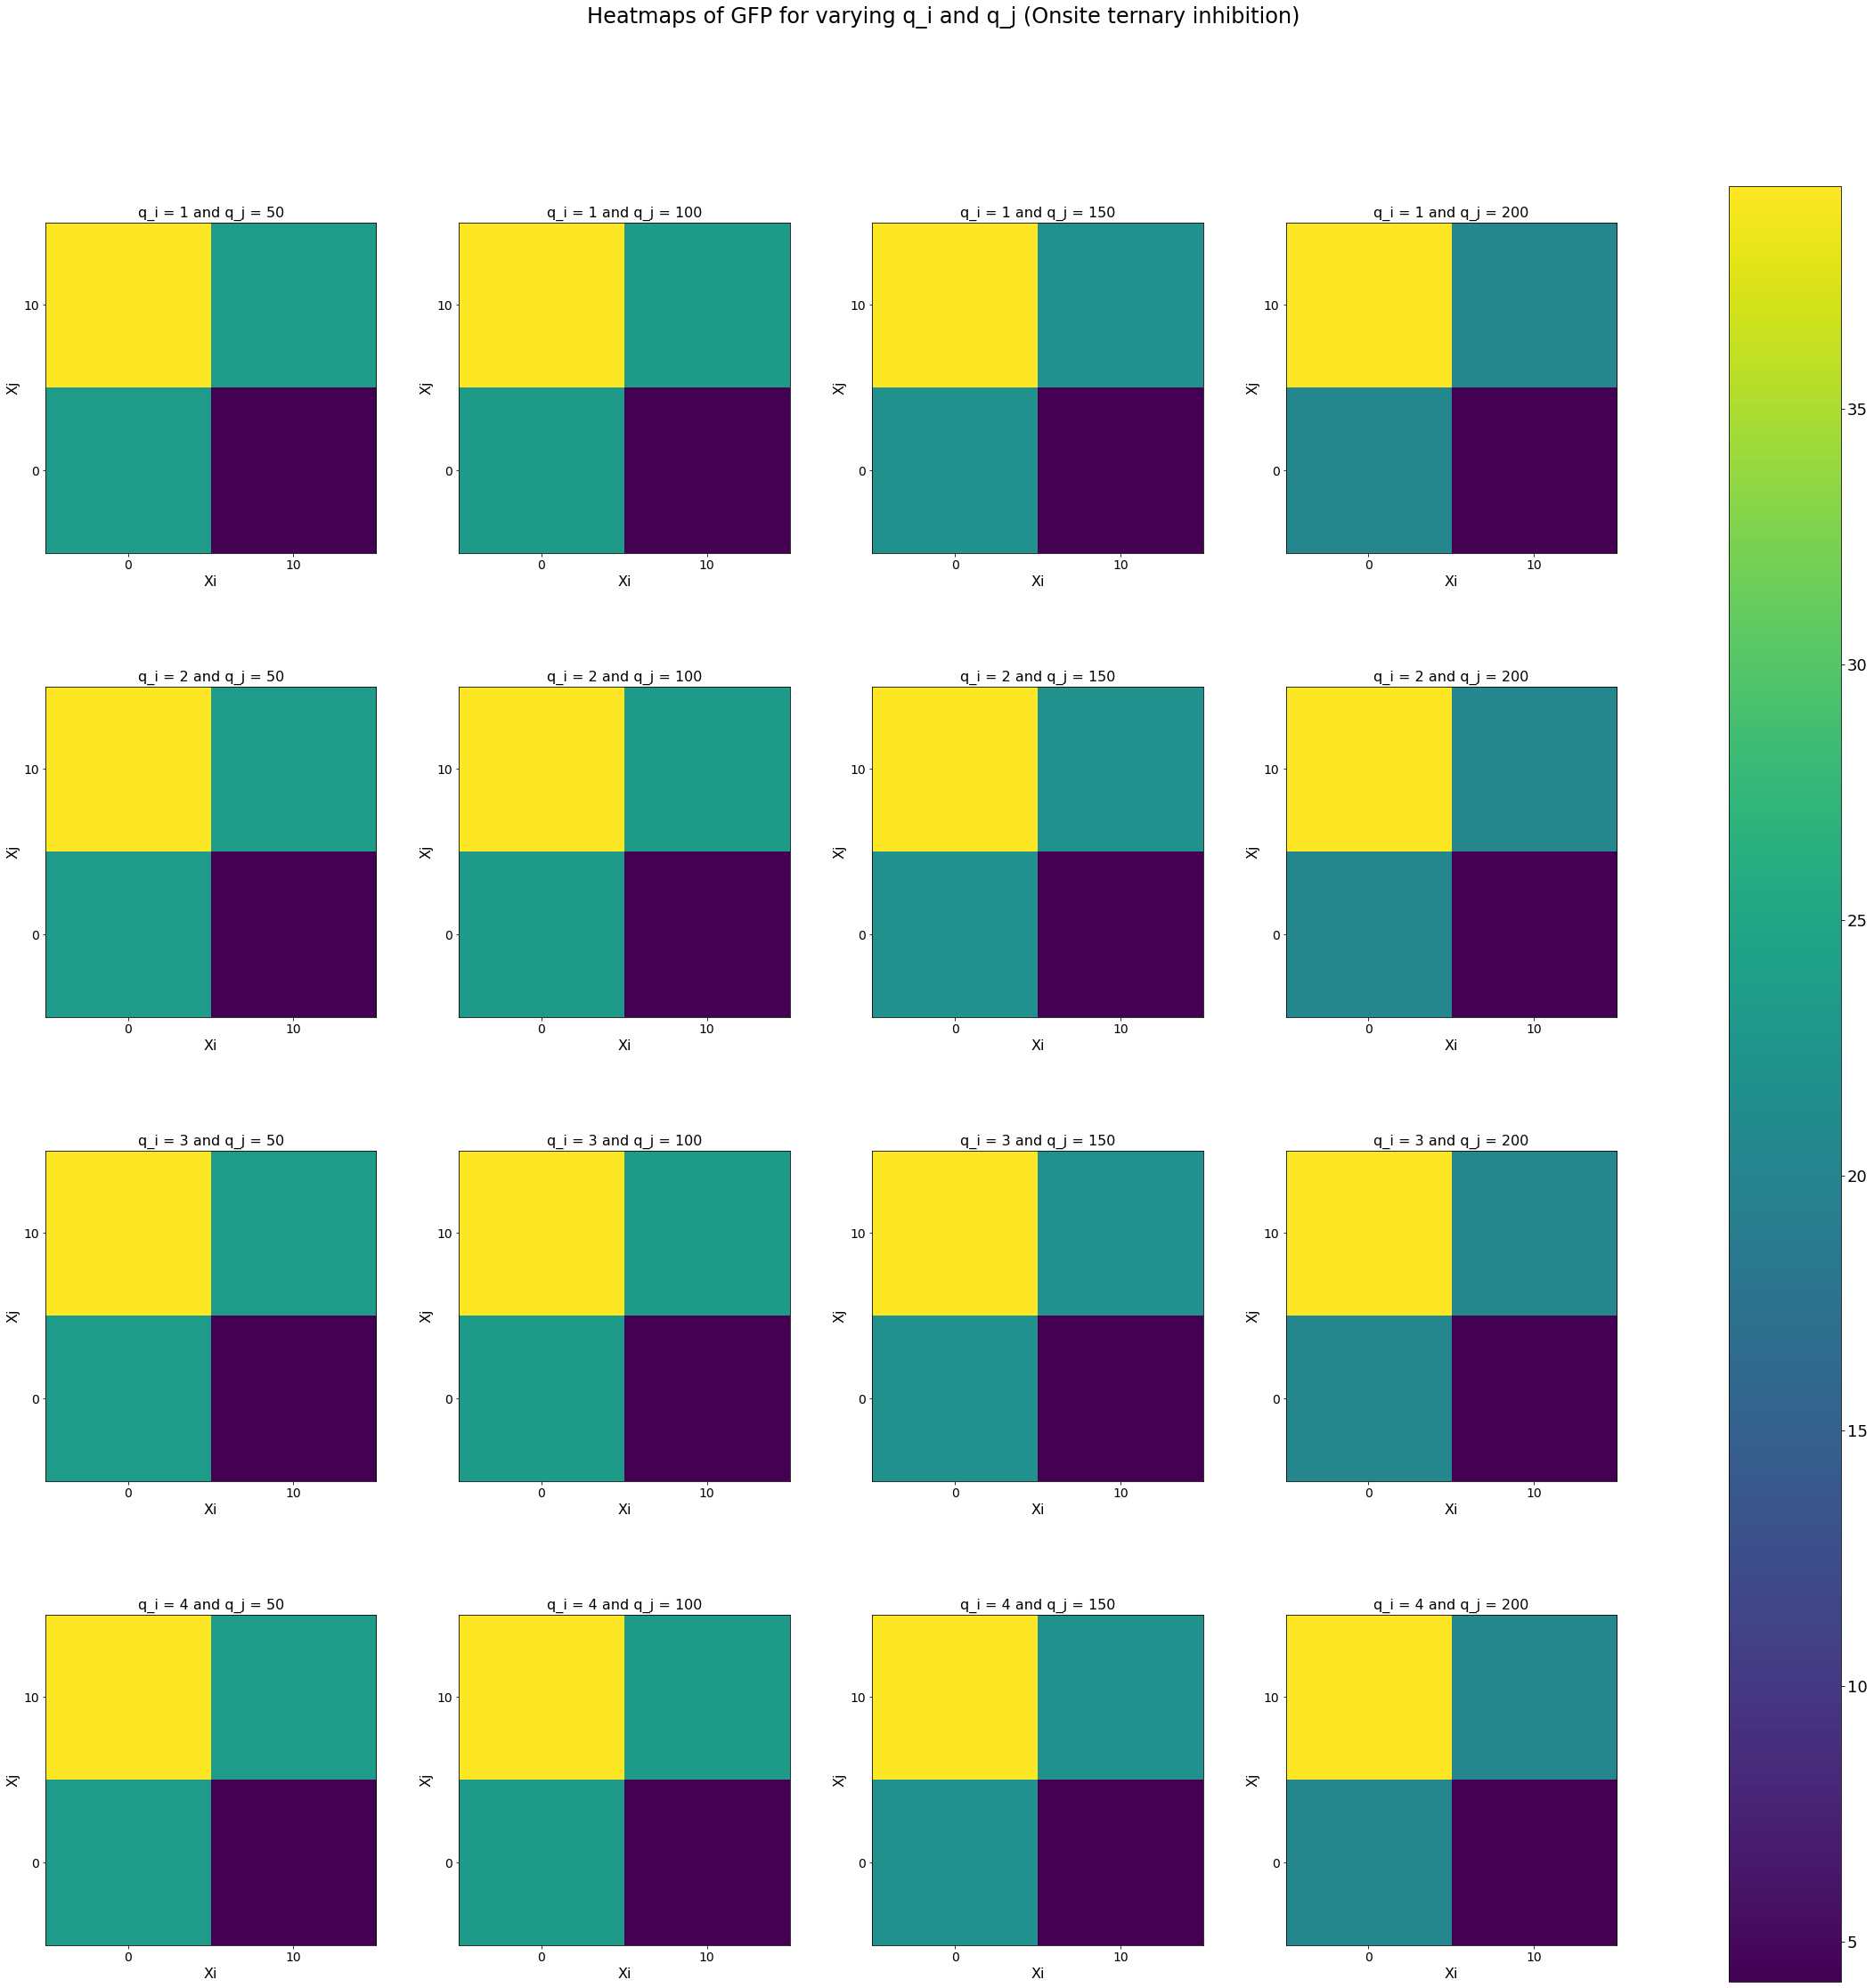

In [9]:
# Heatmaps of GFP for varying q_i and q_j
# Onsite ternary inhibition

NUM = int(np.sqrt(no_MCP_q1_q2_vals.shape[0]))
fig, ax = plt.subplots(figsize=(35, 35), nrows=NUM, ncols=NUM)

bottom, top = 0.1, 0.9
left, right = 0.1, 0.8

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)

p = [0]*(NUM*NUM)
index = 0
for kval in no_MCP_q1_q2_vals:
    p[index] = ax[index//NUM, index%NUM].imshow(no_MCP_on_arr[index, :].reshape(num, num), 
                                            interpolation='none', origin="lower")
    ax[index//NUM, index%NUM].set_title("q_i = {} and q_j = {}".format(kval[0],kval[1]), fontsize=16)
    ax[index//NUM, index%NUM].set_xticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_yticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_xlabel('Xi', fontsize = 16)
    ax[index//NUM, index%NUM].set_ylabel('Xj', fontsize = 16)
    ax[index//NUM, index%NUM].tick_params(axis='both', which='major', labelsize=14)
    index = index + 1


cbar_ax = fig.add_axes([0.85, bottom, 0.05, top-bottom])
fig.colorbar(p[-1], cax=cbar_ax)
cbar_ax.tick_params(labelsize=18) 
   
plt.suptitle("Heatmaps of GFP for varying q_i and q_j (Onsite ternary inhibition)", fontsize=24)
plt.savefig("Plots/heatmap_qi_qj_onsite_ternary.png")
plt.show()

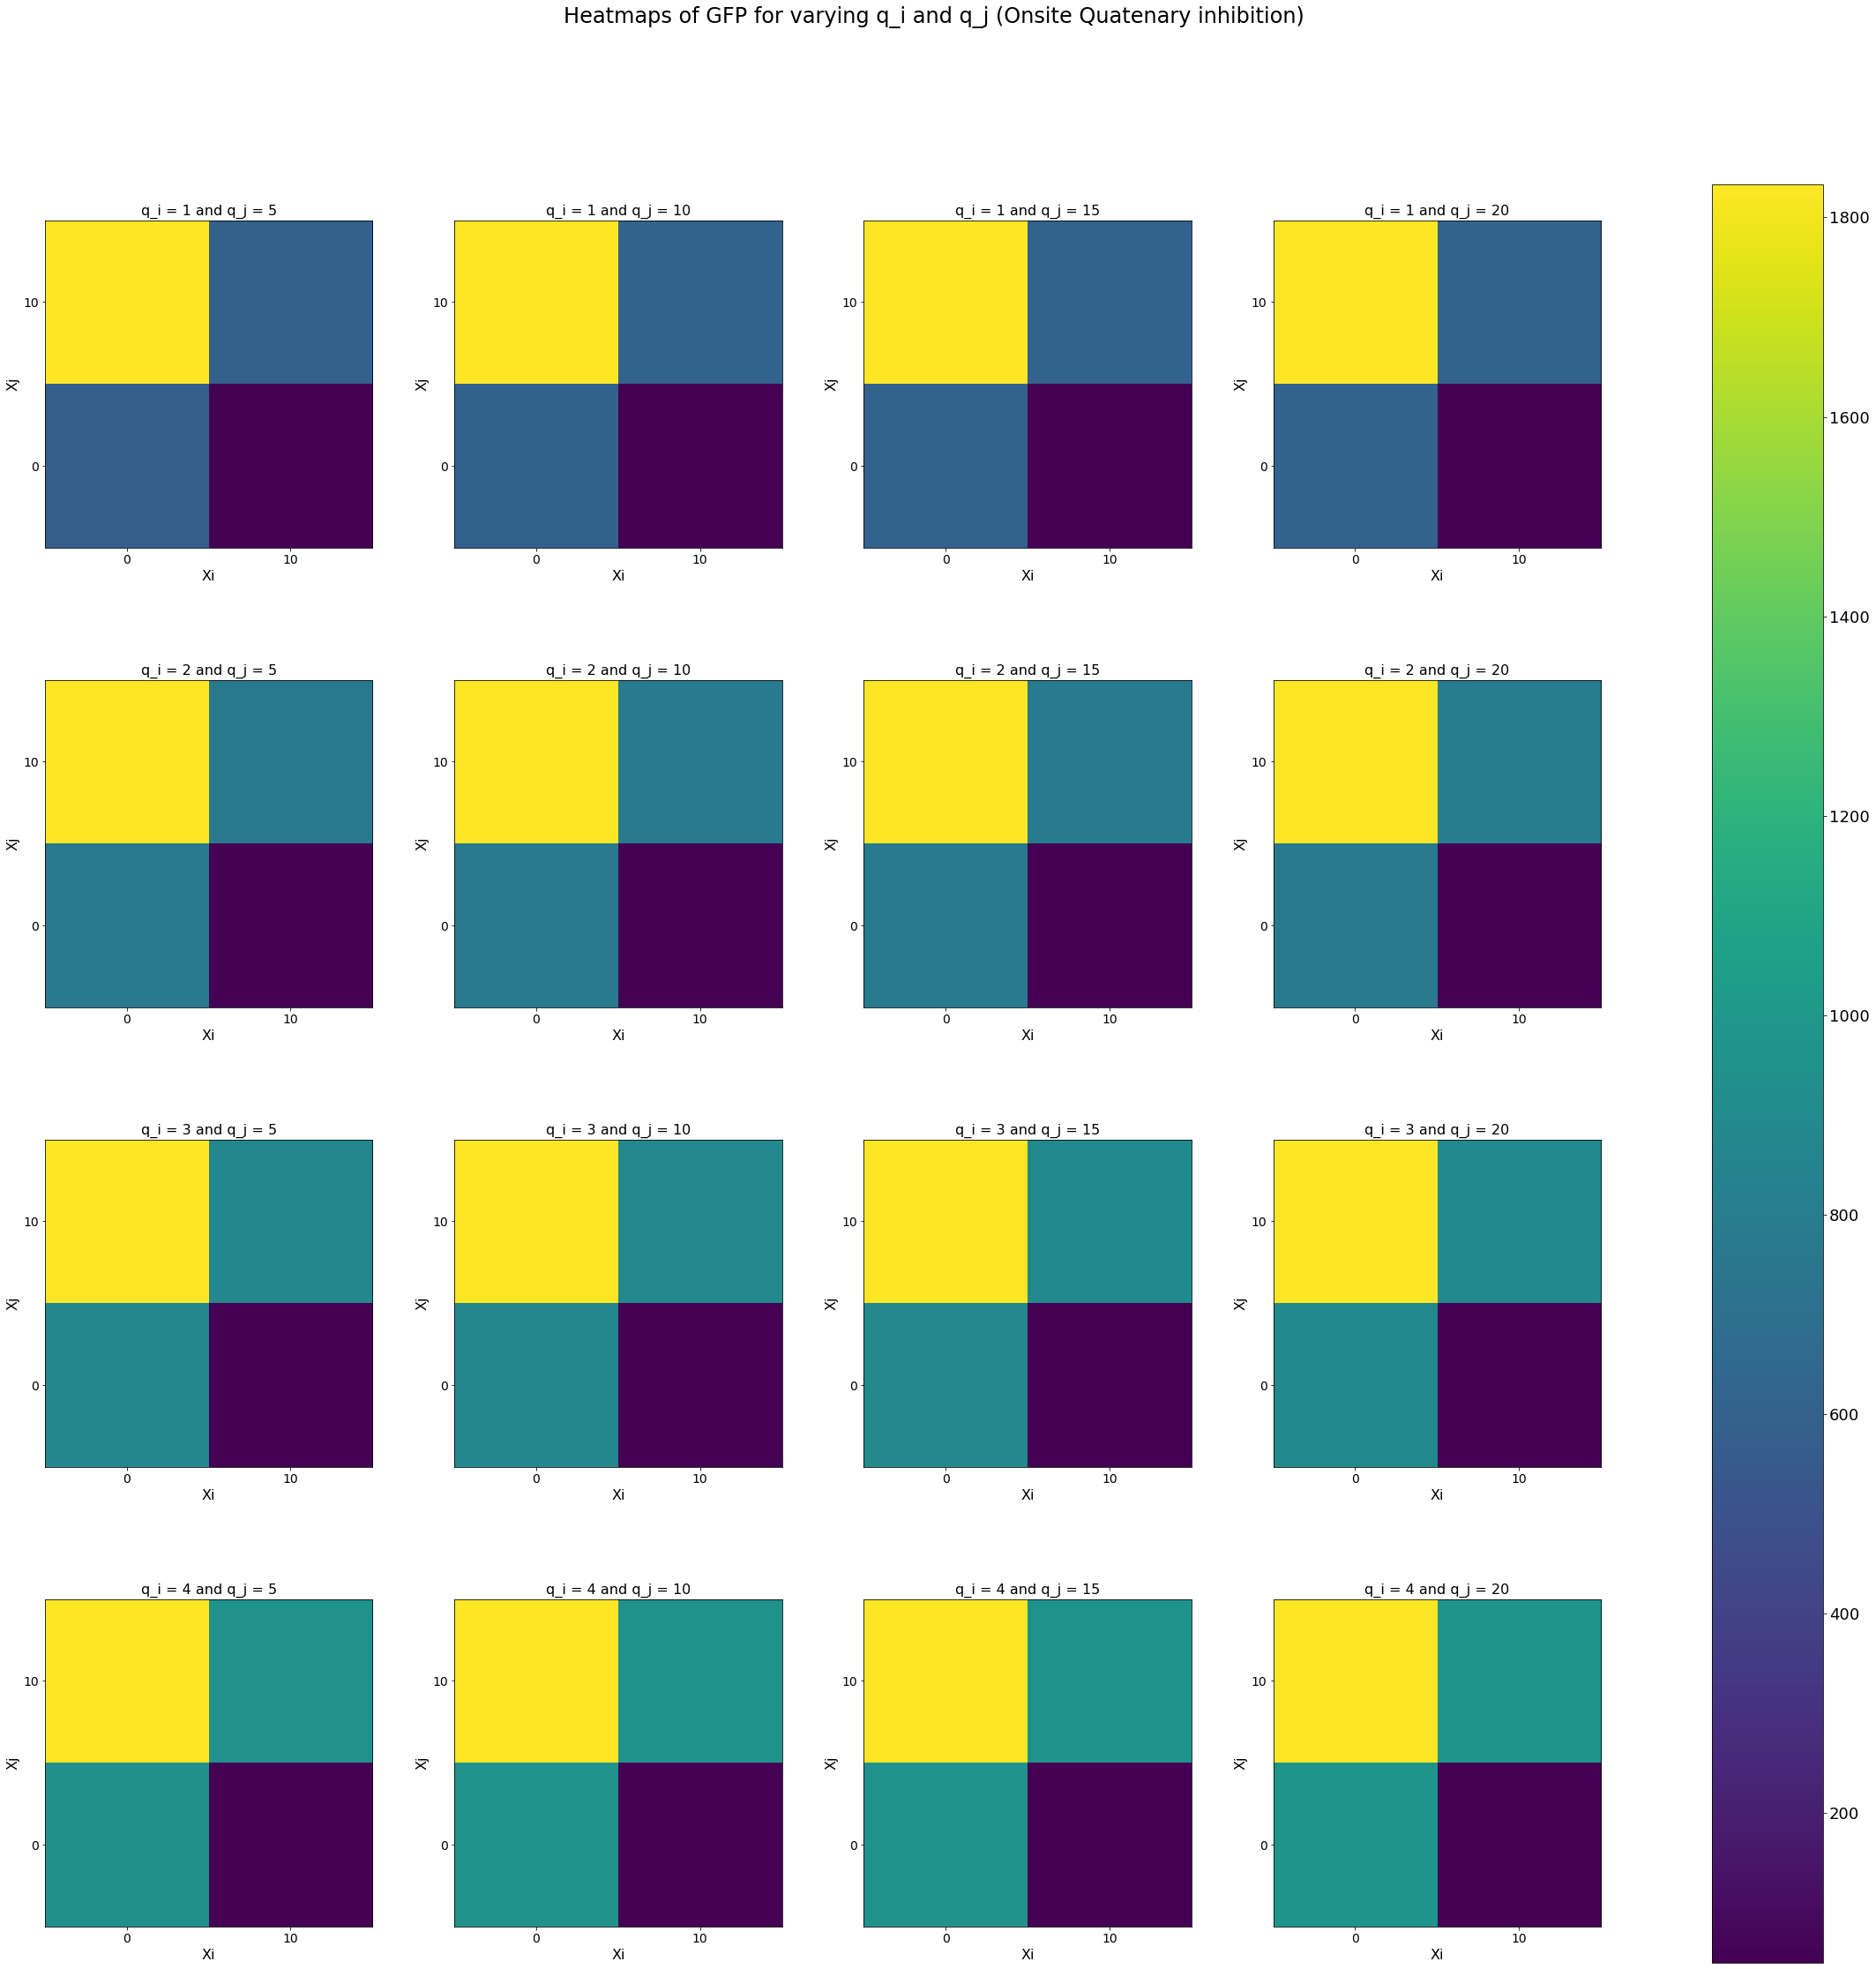

In [10]:
# Heatmas of GFP for varying q_i and q_j
# Onsite quatenary inhibition


NUM = int(np.sqrt(MCP_q1_q2_vals.shape[0]))
fig, ax = plt.subplots(figsize=(35, 35), nrows=NUM, ncols=NUM)

bottom, top = 0.1, 0.9
left, right = 0.1, 0.8

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)

p = [0]*(NUM*NUM)
index = 0
for kval in MCP_q1_q2_vals:
    p[index] = ax[index//NUM, index%NUM].imshow(MCP_on_arr[index, :].reshape(num, num), 
                                            interpolation='none', origin="lower")
    ax[index//NUM, index%NUM].set_title("q_i = {} and q_j = {}".format(kval[0],kval[1]), fontsize=16)
    ax[index//NUM, index%NUM].set_xticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_yticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_xlabel('Xi', fontsize = 16)
    ax[index//NUM, index%NUM].set_ylabel('Xj', fontsize = 16)
    ax[index//NUM, index%NUM].tick_params(axis='both', which='major', labelsize=14)
    index = index + 1


cbar_ax = fig.add_axes([0.85, bottom, 0.05, top-bottom])
fig.colorbar(p[-1], cax=cbar_ax)
cbar_ax.tick_params(labelsize=18) 
   
plt.suptitle("Heatmaps of GFP for varying q_i and q_j (Onsite Quatenary inhibition)", fontsize=24)
plt.savefig("Plots/heatmap_qi_qj_onsite_quatenary.png")
plt.show()

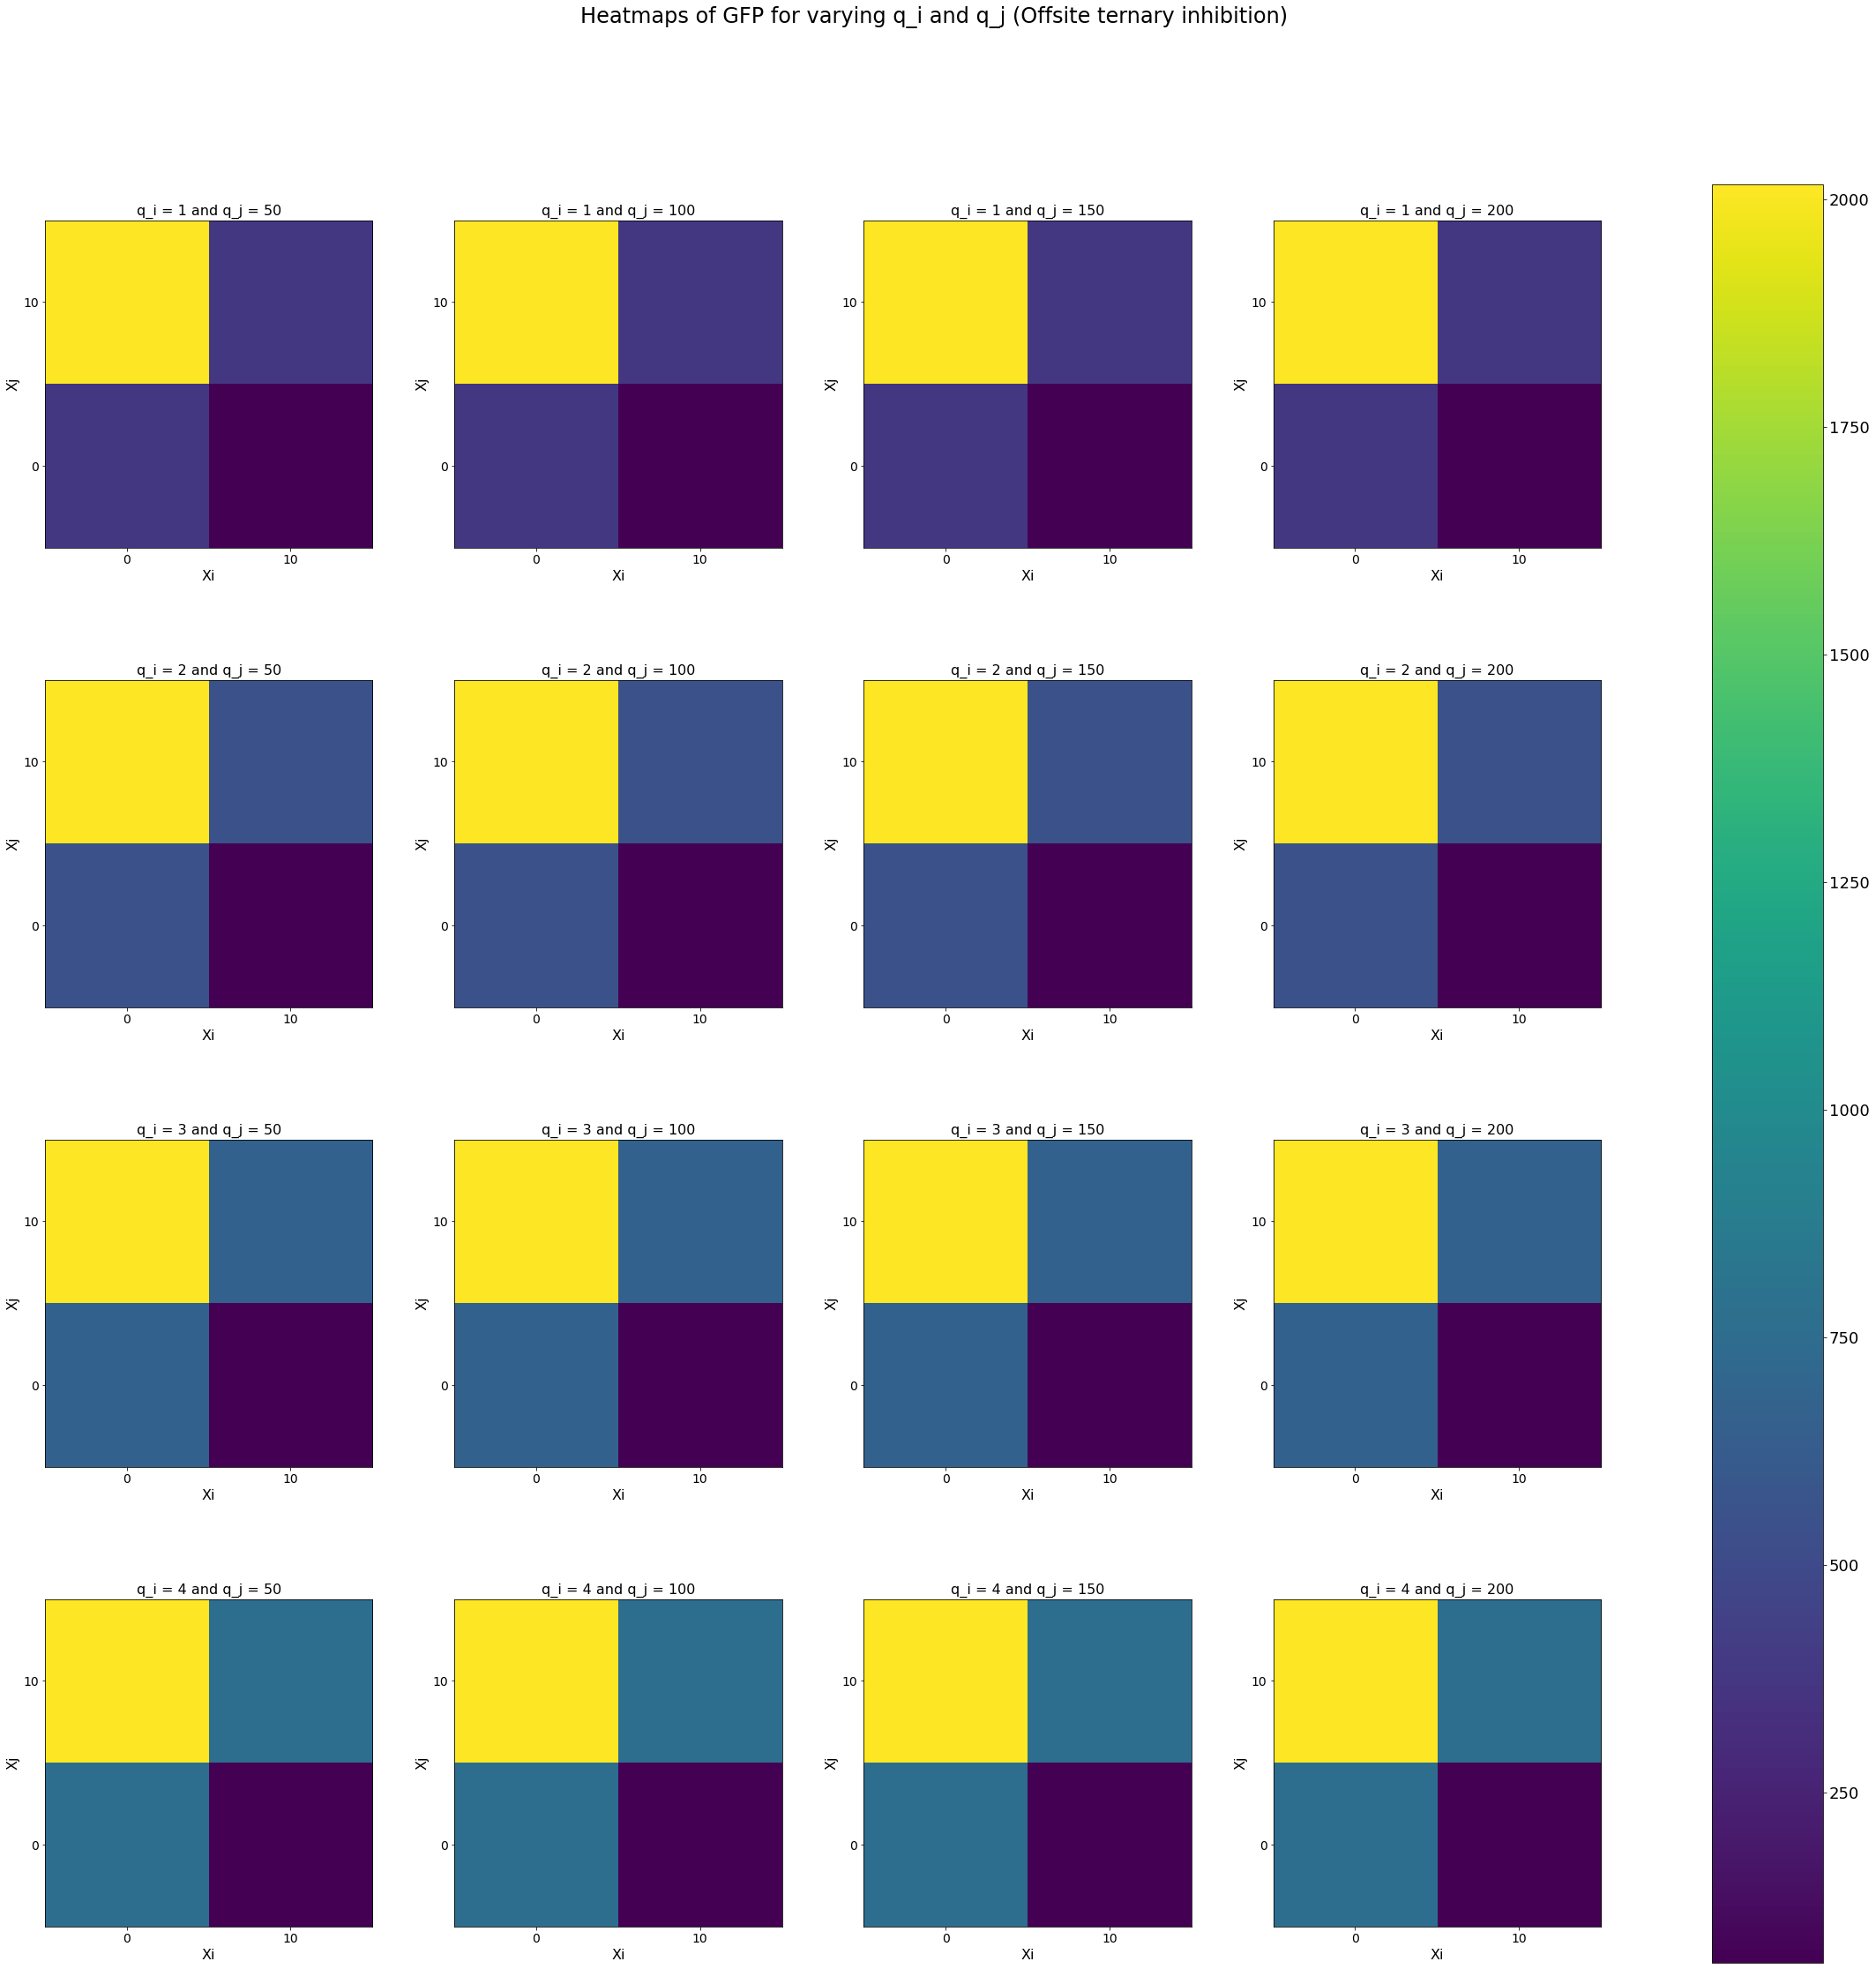

In [11]:
# Heatmas of GFP for varying q_i and q_j
# Offsite ternary inhibition


NUM = int(np.sqrt(no_MCP_q1_q2_vals.shape[0]))
fig, ax = plt.subplots(figsize=(35, 35), nrows=NUM, ncols=NUM)

bottom, top = 0.1, 0.9
left, right = 0.1, 0.8

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)

p = [0]*(NUM*NUM)
index = 0
for kval in no_MCP_q1_q2_vals:
    p[index] = ax[index//NUM, index%NUM].imshow(no_MCP_off_arr[index, :].reshape(num, num), 
                                            interpolation='none', origin="lower")
    ax[index//NUM, index%NUM].set_title("q_i = {} and q_j = {}".format(kval[0],kval[1]), fontsize=16)
    ax[index//NUM, index%NUM].set_xticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_yticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_xlabel('Xi', fontsize = 16)
    ax[index//NUM, index%NUM].set_ylabel('Xj', fontsize = 16)
    ax[index//NUM, index%NUM].tick_params(axis='both', which='major', labelsize=14)
    index = index + 1


cbar_ax = fig.add_axes([0.85, bottom, 0.05, top-bottom])
fig.colorbar(p[-1], cax=cbar_ax)
cbar_ax.tick_params(labelsize=18) 
   
plt.suptitle("Heatmaps of GFP for varying q_i and q_j (Offsite ternary inhibition)", fontsize=24)
plt.savefig("Plots/heatmap_qi_qj_offsite_ternary.png")
plt.show()

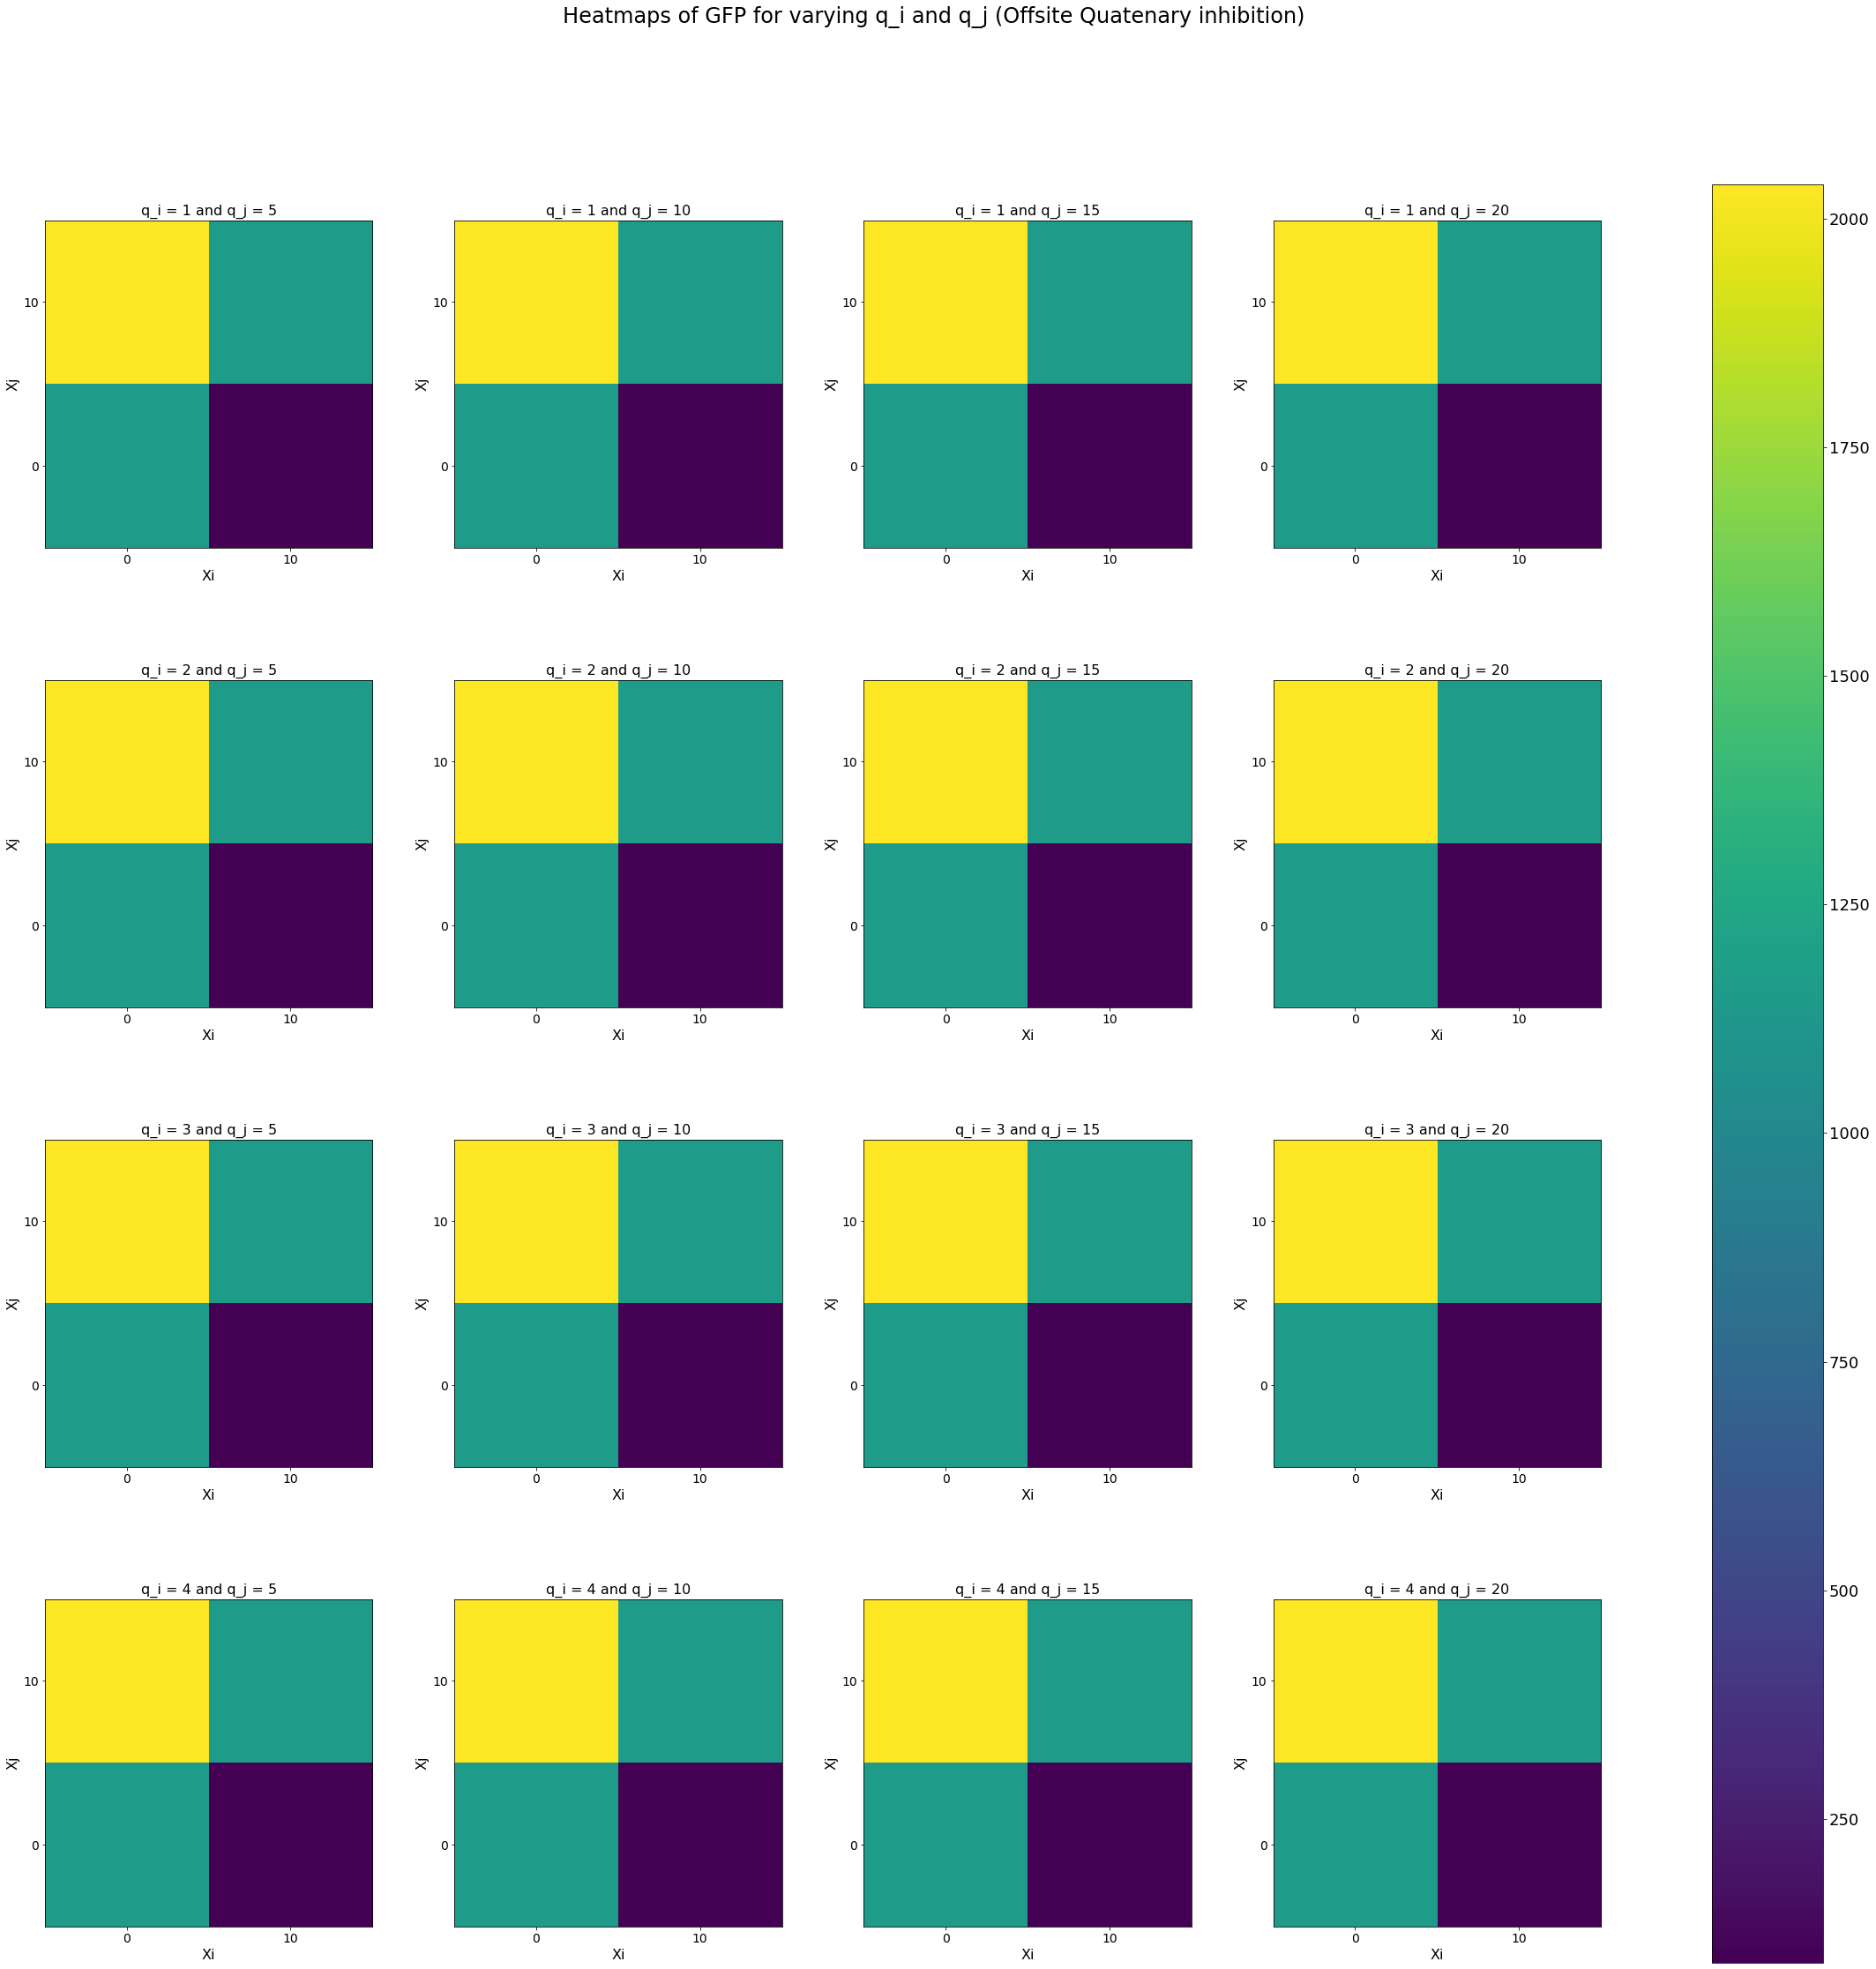

In [12]:
# Heatmas of GFP for varying q_i and q_j
# Offsite quatenary inhibition

NUM = int(np.sqrt(MCP_q1_q2_vals.shape[0]))
fig, ax = plt.subplots(figsize=(35, 35), nrows=NUM, ncols=NUM)

bottom, top = 0.1, 0.9
left, right = 0.1, 0.8

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)

p = [0]*(NUM*NUM)
index = 0
for kval in MCP_q1_q2_vals:
    p[index] = ax[index//NUM, index%NUM].imshow(MCP_off_arr[index, :].reshape(num, num), 
                                            interpolation='none', origin="lower")
    ax[index//NUM, index%NUM].set_title("q_i = {} and q_j = {}".format(kval[0],kval[1]), fontsize=16)
    ax[index//NUM, index%NUM].set_xticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_yticks(np.arange(num), np.arange(num)*10)
    ax[index//NUM, index%NUM].set_xlabel('Xi', fontsize = 16)
    ax[index//NUM, index%NUM].set_ylabel('Xj', fontsize = 16)
    ax[index//NUM, index%NUM].tick_params(axis='both', which='major', labelsize=14)
    index = index + 1


cbar_ax = fig.add_axes([0.85, bottom, 0.05, top-bottom])
fig.colorbar(p[-1], cax=cbar_ax)
cbar_ax.tick_params(labelsize=18) 
   
plt.suptitle("Heatmaps of GFP for varying q_i and q_j (Offsite Quatenary inhibition)", fontsize=24)
plt.savefig("Plots/heatmap_qi_qj_offsite_quatenary.png")
plt.show()